In [1]:

import numpy
import pandas
import sklearn.linear_model
import sklearn.ensemble
import matplotlib
import seaborn


In [2]:
df =  pandas.read_excel('Electronic-store-sales-details.xls')

###  General Analysis of the Data

In [3]:
df.shape

(9994, 21)

In [4]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Laptops,Dell,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Laptops,HP,"Hon Deluxe Fabric Upholstered Stacking HP, Rou...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Mobile Phones,HTC,Self-Adhesive Address HTC for Typewriters by U...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Laptops,Lenovo,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Mobile Phones,OnePlus,Eldon Fold 'N Roll CLG System,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 21)

In [6]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500800,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.162802,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Visualisation of the data and answering to some questions.

<AxesSubplot:>

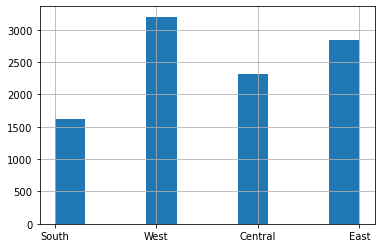

In [8]:
df['Region'].hist()

#### Histogram shows that most of sales take place in West then East then Central then South. 

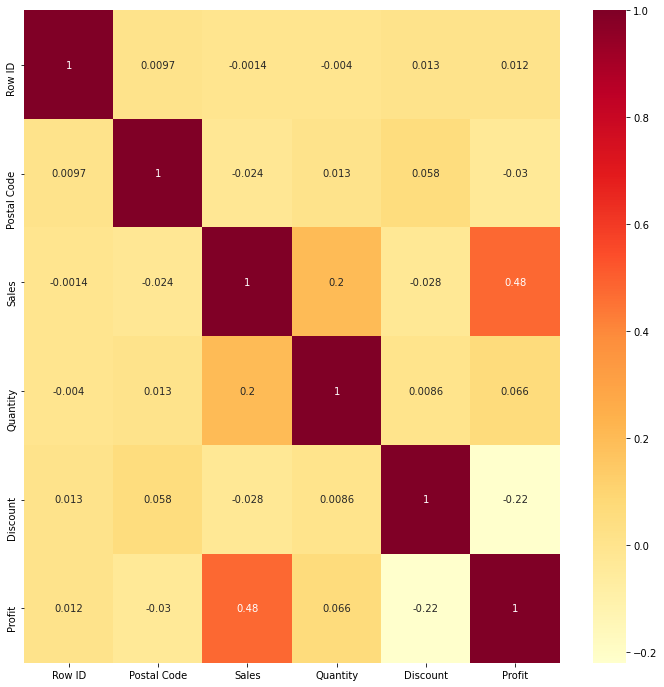

In [9]:
#Calculating Correlation
correlation = df.corr()

#Plotting correlation
matplotlib.pyplot.figure(figsize=(12,12))
corr_heatmap = seaborn.heatmap(correlation,annot=True,cmap="YlOrRd")

##### Sales and profit has the bigest relation.Sales and Quantity are also related to each other. 

In [10]:
# Who sold the most? (Segment)
segment_sales= df.groupby(["Segment"]).sum().sort_values("Sales", ascending=False)

In [11]:
segment_sales

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,,
Consumer,25581337,288878609,1.161401e+06,19521,820.91,134119.2092
Corporate,15504734,164536330,7.061464e+05,11608,477.85,91979.1340
Home Office,8858952,98157713,4.296531e+05,6744,262.33,60298.6785


<AxesSubplot:xlabel='Segment'>

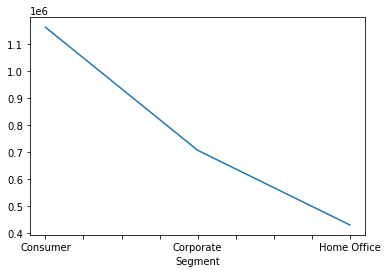

In [12]:
segment_sales['Sales'].plot()

In [13]:
# Vilken produktkategori såldes mest 
category_sales= df.groupby(["Category"]).sum().sort_values("Sales", ascending=True)

In [14]:
category_sales

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,,
Mobile Phones,30010539,330772872,719047.0320,22906,947.80,122490.8008
Laptops,10693330,118196026,741999.7953,8028,368.89,18451.2728
Cameras,9241154,102603754,836154.0330,6939,244.40,145454.9481


<AxesSubplot:xlabel='Category'>

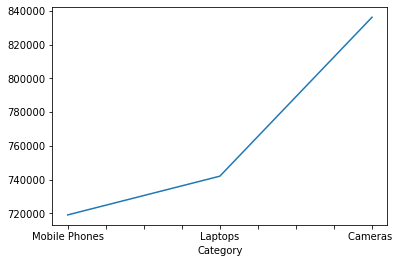

In [15]:
category_sales['Sales'].plot()

In [16]:
# Which state sold the most quantity
group = df.groupby(["State","Quantity"]).sum()
total_sales_Quantity= group["Sales"].groupby(level=0, group_keys=True)
total_sales_Quantity.max().nlargest(5)

State
California    93163.4310
New York      61479.1520
Texas         39548.0352
Washington    27882.0960
Florida       26920.7430
Name: Sales, dtype: float64

<AxesSubplot:xlabel='State'>

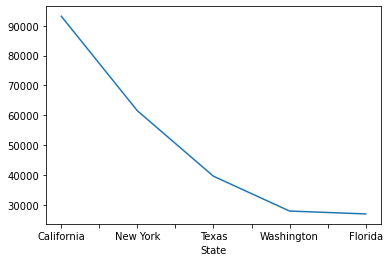

In [17]:
total_sales_Quantity.max().nlargest(5).plot()

<AxesSubplot:xlabel='State'>

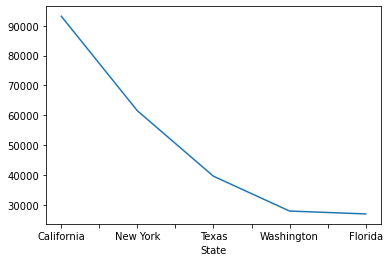

In [18]:
total_sales_Quantity.max().nlargest(5).plot()

In [19]:
# Vilken region har det högsta totala försäljningsbeloppet?
region_sales= df.groupby(["Region"]).sum().sort_values("Sales", ascending=False)

In [20]:
region_sales

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,,
West,15971838,293739752,725457.8245,12266,350.20,108418.4489
East,14073919,50171698,678781.2400,10618,414.00,91522.7800
Central,11685963,151786150,501239.8908,8780,558.34,39706.3625
South,8213303,55875052,391721.9050,6209,238.55,46749.4303


<AxesSubplot:xlabel='Region'>

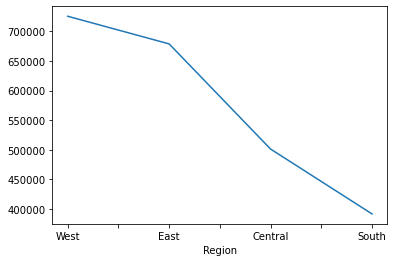

In [21]:
region_sales['Sales'].plot()

In [22]:
# Hur mycket blir det totala försäljningsbeloppet i varje butik över en månad.
# Convert date column from dialy sales to monthly sales and sum it according to which store (Region) had been sold
region_sales_month = df.set_index("Order Date").groupby([pandas.Grouper(freq="M"), 'Region']).sum().reset_index()

In [23]:
region_sales_month

,Order Date,Region,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,2016-01-31,Central,114638,966291,5942.1560,57,3.30,474.0926
1,2016-01-31,East,168589,566452,4860.0870,133,4.00,799.0267
2,2016-01-31,South,75310,480707,4082.4260,69,2.90,907.4586
3,2016-01-31,West,119435,2344284,3657.8220,99,1.60,644.2454
4,2016-02-29,Central,40743,655582,1115.7280,41,3.00,-142.5653
...,...,...,...,...,...,...,...,...
187,2019-11-30,West,429654,8075060,14548.8960,364,10.60,1750.1860
188,2019-12-31,Central,335122,4270962,16737.6012,247,11.32,4191.4962
189,2019-12-31,East,341944,1778672,24678.7670,330,13.80,-12.2413
190,2019-12-31,South,228673,1547093,5320.2800,175,6.80,-125.2759


<AxesSubplot:>

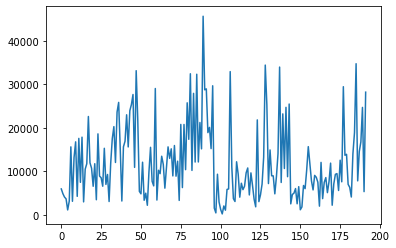

In [24]:
region_sales_month['Sales'].plot()

In [25]:
# Vilken produktkategori såldes mest och i vilken stat?
group = df.groupby(["Category","State"]).sum()
total_sales_Category= group["Sales"].groupby(level=0, group_keys=True)
total_sales_Category.nlargest(1)

Category       Category       State     
Cameras        Cameras        California    159271.0820
Laptops        Laptops        California    156064.6015
Mobile Phones  Mobile Phones  California    142351.9480
Name: Sales, dtype: float64

In [26]:
total_sales_state = df.groupby(['State'])['Sales'].sum().reset_index()


In [27]:
total_sales_state.head()

,State,Sales
0,Alabama,19510.6400
1,Arizona,35282.0010
2,Arkansas,11678.1300
3,California,457687.6315
4,Colorado,32108.1180


In [28]:
# five states that has the largest sales
largest_five_sales_state = total_sales_state.nlargest(5, 'Sales')

In [29]:
largest_five_sales_state

,State,Sales
3,California,457687.6315
30,New York,310876.2710
41,Texas,170188.0458
45,Washington,138641.2700
36,Pennsylvania,116511.9140



### Now we are moving to  predict total sales per Month

#### Product (Category) total monthly Sales Per Month

In [30]:
df2 =  pandas.read_excel('Electronic-store-sales-details.xls')

In [31]:
df2.rename(columns = {'Order Date':'Date'}, inplace = True)

In [32]:
# Convert date column from daily sales to quarterly sales and sum it according to which categorey had been sold
category_sales = df2.set_index("Date").groupby([pandas.Grouper(freq="Q"), 'Category']).sum().reset_index()

In [33]:
category_sales

,Date,Category,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,2016-03-31,Cameras,361109,3831611,39446.8320,255,11.10,7319.7652
1,2016-03-31,Laptops,451744,4007176,24349.3860,332,14.52,125.7279
2,2016-03-31,Mobile Phones,909288,8421872,29440.9630,656,25.30,3995.8777
3,2016-06-30,Cameras,479698,5112800,60095.3450,366,13.40,10542.7889
4,2016-06-30,Laptops,557291,6408344,41402.4970,455,21.70,2083.0408
5,2016-06-30,Mobile Phones,1694561,18896511,34584.4590,1419,60.50,3764.5097
6,2016-09-30,Cameras,629309,7063263,45824.8080,459,16.70,8109.0475
7,2016-09-30,Laptops,782985,8431186,52814.6322,558,27.56,1247.3641
8,2016-09-30,Mobile Phones,2331051,26359582,45147.9220,1750,74.70,6467.1932
9,2016-12-31,Cameras,825903,9527285,80997.1950,618,21.50,13802.3904


In [34]:
dataset = category_sales[["Date",'Category','Sales']]

In [35]:
dataset

,Date,Category,Sales
0,2016-03-31,Cameras,39446.8320
1,2016-03-31,Laptops,24349.3860
2,2016-03-31,Mobile Phones,29440.9630
3,2016-06-30,Cameras,60095.3450
4,2016-06-30,Laptops,41402.4970
5,2016-06-30,Mobile Phones,34584.4590
6,2016-09-30,Cameras,45824.8080
7,2016-09-30,Laptops,52814.6322
8,2016-09-30,Mobile Phones,45147.9220
9,2016-12-31,Cameras,80997.1950


In [36]:
dataset = dataset.pivot(index='Date', columns='Category')
print(dataset)

                 Sales                          
Category      Cameras      Laptops Mobile Phones
Date                                            
2016-03-31   39446.832  24349.3860     29440.963
2016-06-30   60095.345  41402.4970     34584.459
2016-09-30   45824.808  52814.6322     45147.922
2016-12-31   80997.195  80334.9208     74766.638
2017-03-31   56188.699  23723.8142     43232.347
2017-06-30   43011.075  45032.1030     45721.194
2017-09-30   67771.691  56283.1020     72197.163
2017-12-31  104759.346  90348.2500     84946.471
2018-03-31   37262.974  22656.1390     14528.683
2018-06-30   27231.275  28063.7496     31243.735
2018-09-30   47751.366  41957.8783     53923.968
2018-12-31   63032.618  64515.0862     52080.026
2019-03-31   18418.246  27374.0986     23059.394
2019-06-30   29239.318  27564.8280     32320.041
2019-09-30   44912.726  49586.0352     35760.814
2019-12-31   70210.519  65993.2752     46093.214


#### This is the dataset that I am going to use to predict the total category sales per month  by usinng 2019 sales

In [37]:
# Monthly category sales in 2019
dataset = pandas.read_excel('Region_Prod_Total_Sales.xlsx')

In [38]:
dataset

,Month-ID,Month,Cameras,Laptops,Mobile Phones,Total_Sales
0,1,2019-01-31,4625.354,11739.9416,1808.780,18174.0756
1,2,2019-02-28,3448.970,3134.3740,5368.067,11951.4110
2,3,2019-03-31,10343.922,12499.7830,15882.547,38726.2520
3,4,2019-04-30,11160.952,10475.6985,12558.558,34195.2085
4,5,2019-05-31,11643.000,9374.9505,9113.736,30131.6865
5,6,2019-06-30,6435.366,7714.1790,10647.747,24797.2920
6,7,2019-07-31,10370.966,13674.4200,4719.939,28765.3250
7,8,2019-08-31,15524.632,9638.5922,11735.108,36898.3322
8,9,2019-09-30,19017.128,26273.0230,19305.767,64595.9180
9,10,2019-10-31,10704.890,12026.6235,8673.410,31404.9235


In [39]:
dataset.corr()

,Month-ID,Cameras,Laptops,Mobile Phones,Total_Sales
Month-ID,1.000000,0.812407,0.702644,0.606137,0.787879
Cameras,0.812407,1.000000,0.781334,0.708847,0.927050
Laptops,0.702644,0.781334,1.000000,0.752823,0.930760
Mobile Phones,0.606137,0.708847,0.752823,1.000000,0.873694
Total_Sales,0.787879,0.927050,0.930760,0.873694,1.000000


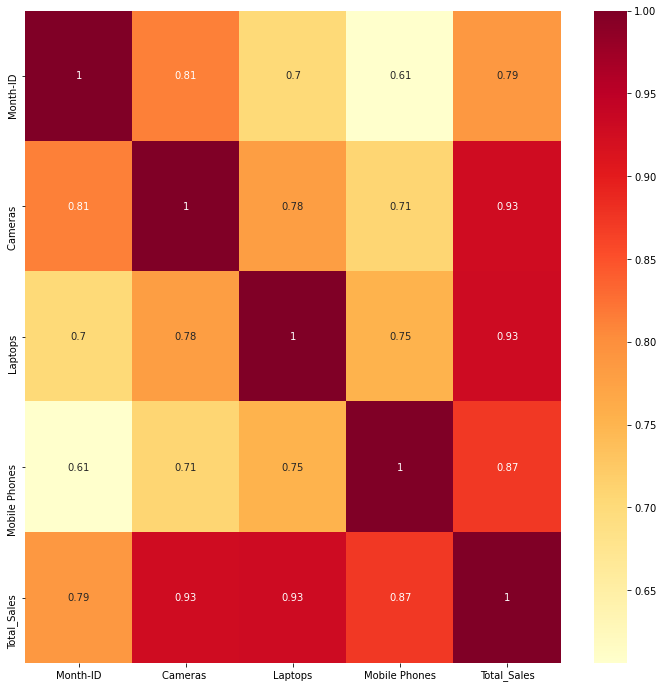

In [40]:
#Calculating Correlation
import matplotlib.pyplot
import seaborn
correlation = dataset.corr()

#Plotting correlation
matplotlib.pyplot.figure(figsize=(12,12))
corr_heatmap = seaborn.heatmap(correlation,annot=True,cmap="YlOrRd")

In [41]:
#df_prod_tot_sales.index.rename('Cameras', inplace=True)

In [42]:
X = dataset.drop(['Total_Sales',],axis=1)  # independant features
y = dataset['Total_Sales']

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [44]:
x_data = dataset.drop(['Total_Sales','Month'],axis=1)
y_data =  dataset['Total_Sales']

In [45]:

# Split the data to train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.2, shuffle=False)

In [46]:
#Lasso
lasso_model = sklearn.linear_model.Lasso(alpha=1.0)
lasso_model.fit(x_train,y_train)
lasso_predict = lasso_model.predict(x_test)
print(lasso_predict)

[31404.960158   75972.71781126 74920.09218178]


In [47]:
#R2 for lasso
R2 = lasso_model.score(x_train,y_train)
print (R2)

#RMSE for lasso
e = y_train - lasso_model.predict(x_train)
MSE = numpy.square(e).mean()
RMSE = numpy.sqrt(MSE)
print (RMSE)

0.9999999999660227
0.08233086306936044



#### Predicting total seles for December 2019

In [48]:
# Camera Sales for West Region for Decemper 
import numpy as np
new_sales = np.array([12.0, 35632.028, 23085.8192, 16201.674]).astype(float)

In [49]:
# new_sales.shape is (4,)
new_sales = np.expand_dims(new_sales, axis=0)
# new_sales.shape is now (1,4)
new_sales.shape

(1, 4)

In [50]:
lasso_model.predict(new_sales)

array([74920.09218178])

#### The Predicted total Sales is 74920.1 while the actual sales is 74919.5

#### Making Predictions with the test data. 
#### While we took 80% of the data as training data (month 1 to month 9) we predict total seling for the test data (October, November and December)

In [51]:
y_test

9     31404.9235
10    75972.5635
11    74919.5212
Name: Total_Sales, dtype: float64

In [52]:
y_pred =lasso_model.predict(x_test)

In [53]:
# Predicted sales for Oct,Nov och December
y_pred

array([31404.960158  , 75972.71781126, 74920.09218178])

### Model Predicts Sales of  October, November och December Months av 2019 : [31404.960158  , 75972.71781126, 74920.09218178]
#### Actual Sales for Oct, Nov and  December
#### 2019-10-31		31404.9235
#### 2019-11-30		75972.5635
#### 2019-12-31		74919.5212

In [54]:
data = {'Actual_Sales':  [31404.9235, 75972.5635, 74919.5212 ],
        'Predicted_Sales': [31404.960158  , 75972.71781126, 74920.09218178]}

result = pandas.DataFrame(data)

print (result)

   Actual_Sales  Predicted_Sales
0    31404.9235     31404.960158
1    75972.5635     75972.717811
2    74919.5212     74920.092182


### Predicting regional category sales in a specific quarter of a year. 

In [72]:
df =  pandas.read_excel('Electronic-store-sales-details.xls')

In [73]:
df.rename(columns = {'Order Date':'Date'}, inplace = True)

In [74]:
start_date = '2019-01-01'
end_date = '2019-12-31'

In [75]:
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)

In [76]:
df = df.loc[mask]
df.head(2)

,Row ID,Order ID,Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Laptops,Lenovo,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Mobile Phones,OnePlus,Eldon Fold 'N Roll CLG System,22.3680,2,0.20,2.5164


In [77]:
sales_per_quarter_Region = df.set_index("Date").groupby([pandas.Grouper(freq="Q"), "Region", 'Category']).sum().reset_index()

In [78]:
sales_per_quarter_Region.head(20)

,Date,Region,Category,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,2019-03-31,Central,Cameras,64209,1064182,3636.9320,55,2.00,862.1820
1,2019-03-31,Central,Laptops,76974,1143928,6250.4876,68,4.86,-694.0370
2,2019-03-31,Central,Mobile Phones,158736,2159685,1880.9460,119,8.20,-388.6021
3,2019-03-31,East,Cameras,111975,671663,5044.8540,64,5.30,-882.5630
4,2019-03-31,East,Laptops,39064,200377,4306.6290,43,2.20,-285.1299
5,2019-03-31,East,Mobile Phones,279852,770168,7794.3850,164,5.60,2814.8953
6,2019-03-31,South,Cameras,16727,137434,557.8940,13,0.40,120.5738
7,2019-03-31,South,Laptops,24056,225983,6245.3360,49,1.40,-1640.9665
8,2019-03-31,South,Mobile Phones,185969,1046741,9641.2130,134,2.90,4080.7444
9,2019-03-31,West,Cameras,55019,1108130,9178.5660,41,1.40,2517.1498


In [79]:
#sales_per_quarter_Region.to_csv('Quarter_Sales_Category.csv')

In [80]:
quarterly_region_sales = sales_per_quarter_Region[['Date','Category', 'Region','Sales']]

In [81]:
quarterly_region_sales

,Date,Category,Region,Sales
0,2019-03-31,Cameras,Central,3636.9320
1,2019-03-31,Laptops,Central,6250.4876
2,2019-03-31,Mobile Phones,Central,1880.9460
3,2019-03-31,Cameras,East,5044.8540
4,2019-03-31,Laptops,East,4306.6290
5,2019-03-31,Mobile Phones,East,7794.3850
6,2019-03-31,Cameras,South,557.8940
7,2019-03-31,Laptops,South,6245.3360
8,2019-03-31,Mobile Phones,South,9641.2130
9,2019-03-31,Cameras,West,9178.5660


In [82]:
print(quarterly_region_sales['Category'].unique())
print(quarterly_region_sales['Region'].unique())
print(quarterly_region_sales['Date'].unique())

['Cameras ' 'Laptops' 'Mobile Phones']
['Central' 'East' 'South' 'West']
['2019-03-31T00:00:00.000000000' '2019-06-30T00:00:00.000000000'
 '2019-09-30T00:00:00.000000000' '2019-12-31T00:00:00.000000000']


#### We must tranform the categorical features to  dummy-variable format and create new binary features for all three kolumns

In [83]:
quarterly_region_sales = pandas.concat([quarterly_region_sales, pandas.get_dummies(quarterly_region_sales['Category'], prefix='Cat', drop_first=False)],axis=1)
quarterly_region_sales = pandas.concat([quarterly_region_sales, pandas.get_dummies(quarterly_region_sales['Region'], prefix='Reg', drop_first=False)],axis=1)
quarterly_region_sales = pandas.concat([quarterly_region_sales, pandas.get_dummies(quarterly_region_sales['Date'], prefix='Q', drop_first=False)],axis=1)
quarterly_region_sales.drop(['Category','Region','Date'], axis=1, inplace=True)

In [84]:
quarterly_region_sales

,Sales,Cat_Cameras,Cat_Laptops,Cat_Mobile Phones,Reg_Central,Reg_East,Reg_South,Reg_West,Q_2019-03-31 00:00:00,Q_2019-06-30 00:00:00,Q_2019-09-30 00:00:00,Q_2019-12-31 00:00:00
0,3636.9320,1,0,0,1,0,0,0,1,0,0,0
1,6250.4876,0,1,0,1,0,0,0,1,0,0,0
2,1880.9460,0,0,1,1,0,0,0,1,0,0,0
3,5044.8540,1,0,0,0,1,0,0,1,0,0,0
4,4306.6290,0,1,0,0,1,0,0,1,0,0,0
5,7794.3850,0,0,1,0,1,0,0,1,0,0,0
6,557.8940,1,0,0,0,0,1,0,1,0,0,0
7,6245.3360,0,1,0,0,0,1,0,1,0,0,0
8,9641.2130,0,0,1,0,0,1,0,1,0,0,0
9,9178.5660,1,0,0,0,0,0,1,1,0,0,0


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

In [86]:
target_name = 'Sales'
robust_scaler = RobustScaler()
X = quarterly_region_sales.drop('Sales', axis=1)
X = robust_scaler.fit_transform(X)
y = quarterly_region_sales[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [87]:
# 1. Import the estimator object (model)
from sklearn.linear_model import LinearRegression
# 2. Create an instance of the estimator
linear_regression = LinearRegression()
# 3. Use the trainning data to train the estimator
linear_regression.fit(X_train, y_train)

LinearRegression()

In [88]:
#print(linear_prediction)
R2 = linear_regression.score(X_train,y_train)
print (R2)

0.6234541765152288


In [89]:
#RMSE for linear
import numpy as np 
e = y_train - linear_regression.predict(X_train)
MSE = np.square(e).mean()
RMSE = np.sqrt(MSE)
print (RMSE)

3157.661747733042


In [90]:
# Print coefficients and intercept for the multiple regression model
print('Trained regression model inercept: ', linear_regression.intercept_)

Trained regression model inercept:  1.459710246874982e+17


In [91]:
print('Trained regression model coefficients: ')
linear_regression.coef_

Trained regression model coefficients: 


array([-3.43113914e+15, -3.43113914e+15, -3.43113914e+15, -1.69758901e+16,
       -1.69758901e+16, -1.69758901e+16, -1.69758901e+16, -1.86590812e+16,
       -1.86590812e+16, -1.86590812e+16, -1.86590812e+16])

#### Making Prediction

In [92]:
# Re-training with all the observations
lin_final = LinearRegression()
# 3. Use the trainning data to train the estimator
lin_final.fit(X, y)

LinearRegression()

In [93]:
# Camera Sales for West Region in quarter 1
new_sales = np.array([1.0, 0.0, 0.0, 0.0,
                           0.0, 0.0, 1.0,
                           1.0, 0.0, 0.0, 
                           0.0]).astype(float)

                          

In [94]:

new_sales.shape 

(11,)

In [95]:
# new_sales.shape is (11,)
new_sales = np.expand_dims(new_sales, axis=0)
# new_sales.shape is now (1,11)
new_sales.shape

(1, 11)

In [96]:
lin_final.predict(new_sales)

array([9622.7950125])

#### The predicted Camera Sales for West Region in the first quarter  is 9622.8 while the actual sales is 9178.6. 
